# **Setup**

In [36]:
!python3 --version

from psutil import *
print(f'CPU Core: {cpu_count()}')
print(f'System RAM {virtual_memory()[0]/(1024**3)} GB')

Python 3.11.4


CPU Core: 8
System RAM 8.0 GB


In [37]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import seaborn as sns
from IPython.display import clear_output
from lifelines.plotting import plot_lifetimes

In [38]:
import os
from zipfile import ZipFile

# **Data Import**

In [39]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
with ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()
    print('No. Of Files In Zip File: ',len(list_of_files),'\n')
    print(list_of_files)

No. Of Files In Zip File:  1 

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [41]:
# Extract Zip File Contents In Main Directory
with ZipFile("telco-customer-churn.zip", "r") as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

In [42]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.shape)
df.columns

(7043, 21)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Pre-Processing**

## **Convert DType Of TotalCharges Column**

In [53]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [54]:
# Convert Data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [55]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


## **Encode Churn Column**

In [58]:
df['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [59]:
df['Churn_Enc'] = df['Churn'].apply(lambda x: 1 if x =='Yes' else 0)

In [60]:
df['Churn_Enc'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Enc, dtype: int64

## **Check Dataframe Info**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Check Missing Values**

In [62]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Enc            0
dtype: int64

## **Impute Missing TotalCharges Values**

In [63]:
df['TotalCharges'].fillna(value=df['TotalCharges'].median(),inplace=True)

In [64]:
df['TotalCharges'].isna().sum()

0

In [75]:
px.histogram(df,'TotalCharges')

# **Data Exploration**

In [ ]:
# Check Missing Data 
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# No. Of Unique Customers 
print('Total Customer IDs: ',len(df['customerID']))
print('Unique Customer IDs: ',len(df['customerID'].unique()))

Total Customer IDs:  7043
Unique Customer IDs:  7043


In [ ]:
# Gender Wise Breakdown of Customer Base
px.histogram(df,'gender')

In [ ]:
# Histogram of Service Tenure 
px.histogram(df,'tenure')   #Unit ?

In [ ]:
# Preferred Service Contract Type
px.histogram(df,'Contract')

In [ ]:
# Histogram Of Monthly Charges
px.histogram(df,'MonthlyCharges')

In [ ]:
# Visualize Churn 
px.histogram(df,'Churn')

In [ ]:
# Histogram Of Service
px.histogram(df,'PhoneService')

In [ ]:
px.histogram(df,'InternetService')

ValueError: Size is invalid. Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None

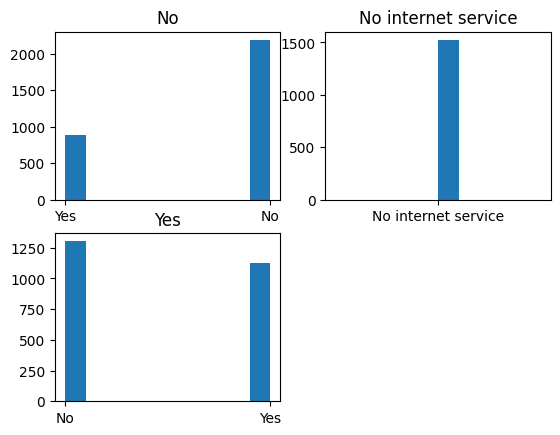

In [ ]:
df.hist('OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV')

In [ ]:
px.histogram(df,'StreamingTV')

In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Enc'],
      dtype='object')

# **Data Processing**

## **Kaplan-Meier Survival Curve**